Обробка ядра 'linear'...
Звіт класифікації SVM з ядром 'linear':
              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84      6315
         1.0       0.85      0.93      0.89      8064

    accuracy                           0.87     14379
   macro avg       0.87      0.86      0.87     14379
weighted avg       0.87      0.87      0.87     14379

Точність (Accuracy): 0.87
Відчутність (Recall): 0.93
Точність (Precision): 0.85
F1 міра: 0.89

Модель збережена у ../models/new_models\svm_model_linear.pkl
Важливості ознак збережені у ../models/importances_models\svm_importances_linear.pkl
Модель SVM завантажена linear успішно 
              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84      6315
         1.0       0.85      0.93      0.89      8064

    accuracy                           0.87     14379
   macro avg       0.87      0.86      0.87     14379
weighted avg       0.87      0.87      0.87     14379



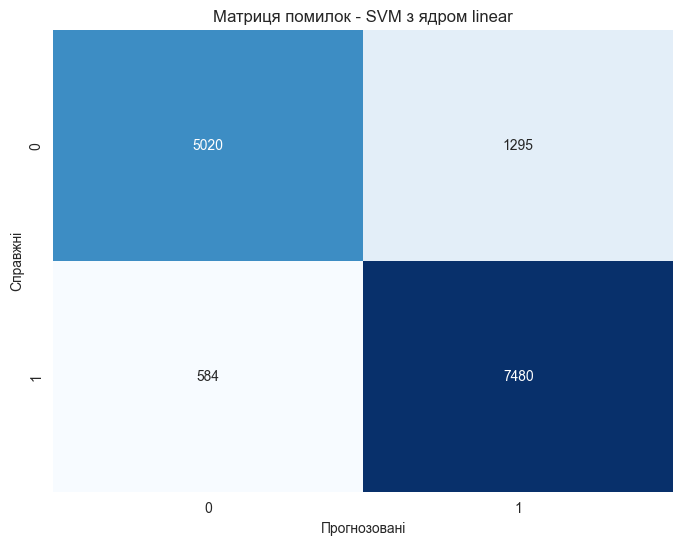

Обробка ядра 'rbf'...
Звіт класифікації SVM з ядром 'rbf':
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89      6315
         1.0       0.91      0.93      0.92      8064

    accuracy                           0.91     14379
   macro avg       0.91      0.90      0.91     14379
weighted avg       0.91      0.91      0.91     14379

Точність (Accuracy): 0.91
Відчутність (Recall): 0.93
Точність (Precision): 0.91
F1 міра: 0.92

Модель збережена у ../models/new_models\svm_model_rbf.pkl
Важливості ознак збережені у ../models/importances_models\svm_importances_rbf.pkl
Модель SVM завантажена rbf успішно 
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89      6315
         1.0       0.91      0.93      0.92      8064

    accuracy                           0.91     14379
   macro avg       0.91      0.90      0.91     14379
weighted avg       0.91      0.91      0.91     14379



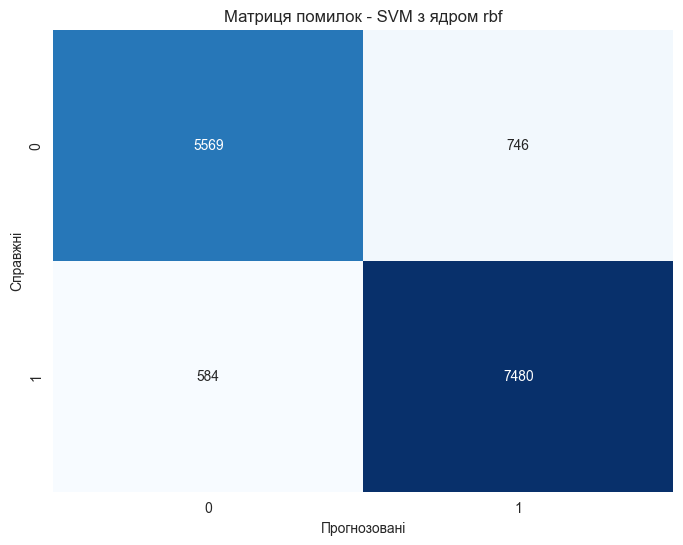

Обробка ядра 'poly'...
Звіт класифікації SVM з ядром 'poly':
              precision    recall  f1-score   support

         0.0       0.90      0.85      0.88      6315
         1.0       0.89      0.93      0.91      8064

    accuracy                           0.89     14379
   macro avg       0.90      0.89      0.89     14379
weighted avg       0.89      0.89      0.89     14379

Точність (Accuracy): 0.89
Відчутність (Recall): 0.93
Точність (Precision): 0.89
F1 міра: 0.91

Модель збережена у ../models/new_models\svm_model_poly.pkl
Важливості ознак збережені у ../models/importances_models\svm_importances_poly.pkl
Модель SVM завантажена poly успішно 
              precision    recall  f1-score   support

         0.0       0.90      0.85      0.88      6315
         1.0       0.89      0.93      0.91      8064

    accuracy                           0.89     14379
   macro avg       0.90      0.89      0.89     14379
weighted avg       0.89      0.89      0.89     14379



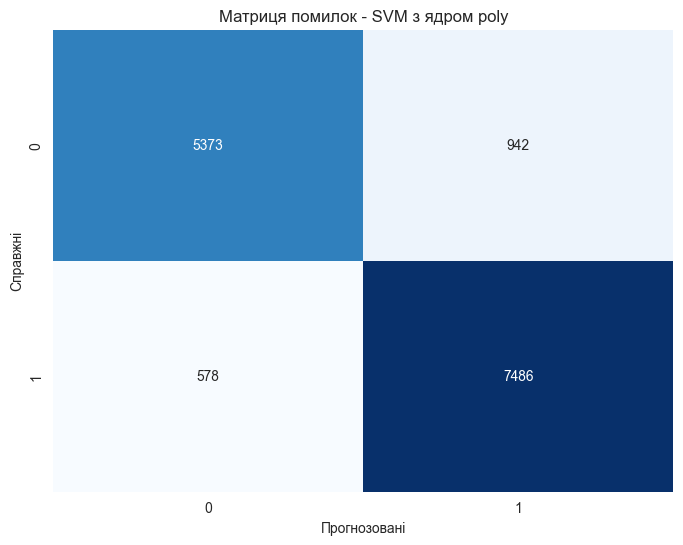

Обробка ядра 'sigmoid'...
Звіт класифікації SVM з ядром 'sigmoid':
              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77      6315
         1.0       0.82      0.82      0.82      8064

    accuracy                           0.80     14379
   macro avg       0.80      0.80      0.80     14379
weighted avg       0.80      0.80      0.80     14379

Точність (Accuracy): 0.80
Відчутність (Recall): 0.82
Точність (Precision): 0.82
F1 міра: 0.82

Модель збережена у ../models/new_models\svm_model_sigmoid.pkl
Важливості ознак збережені у ../models/importances_models\svm_importances_sigmoid.pkl
Модель SVM завантажена sigmoid успішно 
              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77      6315
         1.0       0.82      0.82      0.82      8064

    accuracy                           0.80     14379
   macro avg       0.80      0.80      0.80     14379
weighted avg       0.80      0.80      0.80     143

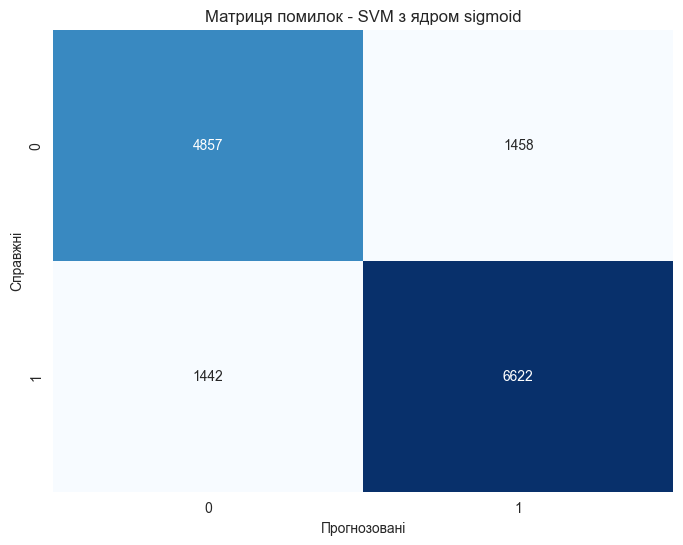

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
import numpy as np
from sklearn.inspection import permutation_importance

# Функція для збереження моделі
def save_model(model, filename):
    joblib.dump(model, filename)
    print(f'Модель збережена у {filename}')

# Функція для збереження важливостей ознак
def save_importances(importances, filename):
    joblib.dump(importances, filename)
    print(f'Важливості ознак збережені у {filename}')

# Функція для побудови матриці помилок
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Прогнозовані')
    plt.ylabel('Справжні')
    plt.show()

# Завантаження даних
data = pd.read_csv('../data/internet_service_churn_scaled.csv')

# Визначення озброєння та цільової змінної
X = data.drop('churn', axis=1)
y = data['churn']

# Розділення на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Перевірка та створення директорії для збереження моделі
model_dir = '../models/new_models'
os.makedirs(model_dir, exist_ok=True)

# Перевірка та створення директорії для збереження важливостей ознак
model_dir_importances = '../models/importances_models'
os.makedirs(model_dir_importances, exist_ok=True)

# Навчання моделі SVM з різними ядрами
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
svm_reports = {}

for kernel in kernels:
    print(f"Обробка ядра '{kernel}'...")
    svm_model = SVC(kernel=kernel, probability=True)  # probability=True для отримання ймовірностей
    svm_model.fit(X_train, y_train)
    svm_predictions = svm_model.predict(X_test)

    # Розрахунок метрик
    accuracy = accuracy_score(y_test, svm_predictions)
    recall = recall_score(y_test, svm_predictions)
    precision = precision_score(y_test, svm_predictions)
    f1 = f1_score(y_test, svm_predictions)
    
    svm_reports[kernel] = {
        'report': classification_report(y_test, svm_predictions, output_dict=True),
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision,
        'f1-score': f1
    }

    print(f"Звіт класифікації SVM з ядром '{kernel}':")
    print(classification_report(y_test, svm_predictions))
    print(f"Точність (Accuracy): {accuracy:.2f}")
    print(f"Відчутність (Recall): {recall:.2f}")
    print(f"Точність (Precision): {precision:.2f}")
    print(f"F1 міра: {f1:.2f}")
    print()

    # Збереження моделі
    model_filename = os.path.join(model_dir, 'svm_model_'+kernel+'.pkl')
    save_model(svm_model, model_filename)
    
    # Пермутаційна важливість ознак
    result = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy')
    importances = pd.Series(result.importances_mean, index=X.columns)
    importances_filename = os.path.join(model_dir_importances, 'svm_importances_'+kernel+'.pkl')
    save_importances(importances, importances_filename)
    
    # Завантаження моделі SVM для перевірки
    loaded_svm_model = joblib.load(model_filename)
    print(f'Модель SVM завантажена {kernel} успішно ')
    
    # Прогнозування з використанням завантаженої моделі
    loaded_predictions = loaded_svm_model.predict(X_test)
    print(classification_report(y_test, loaded_predictions))
    
    # Графік матриці помилок
    plot_confusion_matrix(y_test, loaded_predictions, classes=['0', '1'], title=f'Матриця помилок - SVM з ядром {kernel}')